In [64]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd


In [23]:
#initialize stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('frensh'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
file_path = 'TOKENSSSSS.csv'
data = pd.read_csv(file_path)
data.head()

,Text,Tokenized
0,lord god angels,"['lord', 'god', 'angels']"
1,blessings iv hated needles young strong im for...,"['blessings', 'iv', 'hated', 'needles', 'young..."
2,stage 4 small cell stage 5 3 1 2 years took 16...,"['stage', 'small', 'cell', 'stage', 'years', '..."
3,delia,['delia']
4,get well soon,"['get', 'well', 'soon']"


In [25]:
#function to clean lematize the data
def clean_text(tokens):

    tokens = [re.sub(r'\W+', '', token) for token in tokens]
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if len(token) > 2]
    return tokens

In [17]:
#apply the function
data['Cleaned_Tokens'] = data['Tokenized'].apply(lambda x: clean_text(eval(x)))

#saving thecleaned data
data.to_csv('projetintegrer.csv', index = False)

#display the cleaned data
print(data[['Text', 'Cleaned_Tokens']].head())

                                                Text  \
0                                    lord god angels   
1  blessings iv hated needles young strong im for...   
2  stage 4 small cell stage 5 3 1 2 years took 16...   
3                                              delia   
4                                      get well soon   

                                      Cleaned_Tokens  
0                                 [lord, god, angel]  
1  [blessing, hated, needle, young, strong, forty...  
2  [stage, small, cell, stage, year, took, chemo,...  
3                                            [delia]  
4                                  [get, well, soon]  


Index(['Text', 'Tokenized', 'Cleaned_Tokens'], dtype='object')


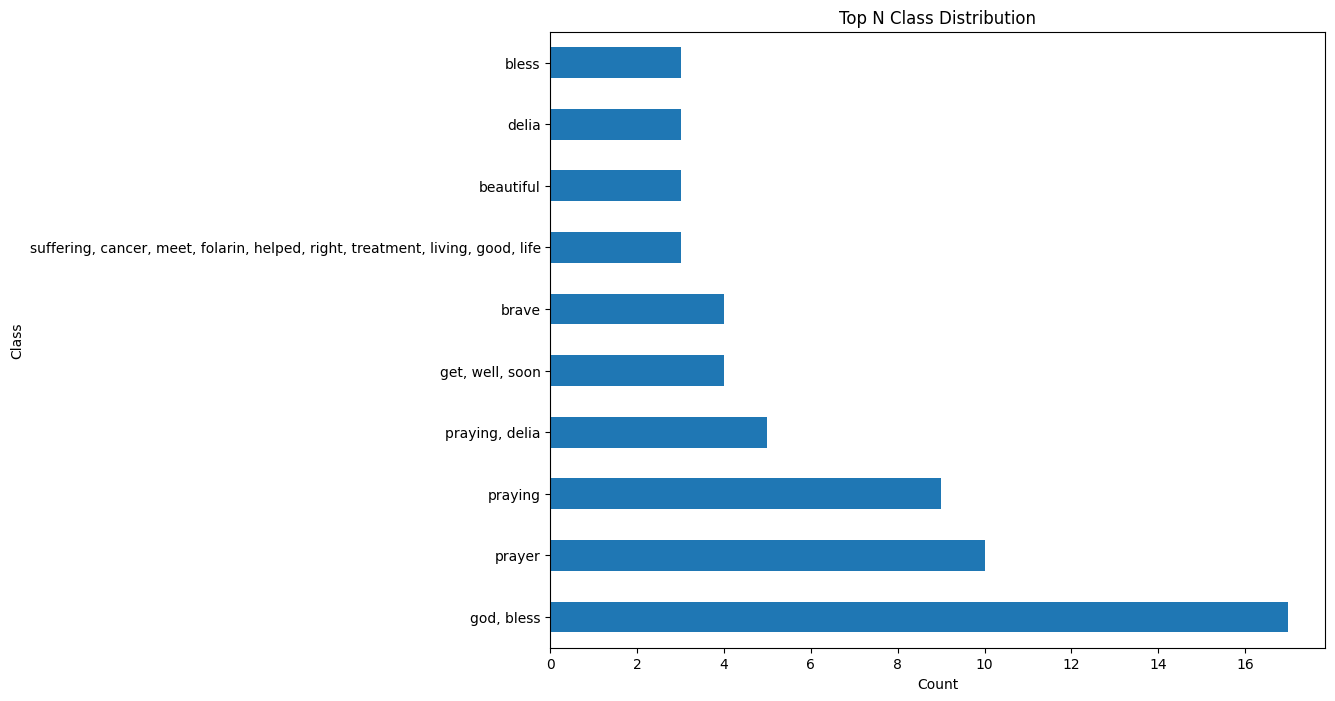

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('projetintegrer.csv')

# Print the columns of the DataFrame to verify the column name
print(data.columns)

# Assuming the target variable is in a column named 'Cleaned_Tokens'
target_column = 'Cleaned_Tokens'

# Check if the target column exists
if target_column in data.columns:
    # Clean the target column by removing square brackets and converting lists to strings
    data[target_column] = data[target_column].astype(str).str.replace('[','').str.replace(']','').str.replace("'","").str.replace('"','')

    # Get the value counts of the target variable
    value_counts = data[target_column].value_counts()

    # Display the top N classes
    N = 10
    top_classes = value_counts.head(N)

    # Plot the top N classes
    plt.figure(figsize=(10, 8))
    top_classes.plot(kind='barh')
    plt.title('Top N Class Distribution')
    plt.xlabel('Count')
    plt.ylabel('Class')
    plt.show()
else:
    print(f"Column '{target_column}' does not exist in the DataFrame.")



In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load your data
data = pd.read_csv('projetintegrer.csv')

# Print the columns of the DataFrame to verify the column name
print(data.columns)

# Ensure 'Cleaned_Tokens' column exists
if 'Cleaned_Tokens' not in data.columns:
    print("Column 'Cleaned_Tokens' does not exist in the DataFrame.")
else:
    import numpy as np
    
    data['Sentiment'] = np.random.randint(0, 2, size=len(data))

    # Clean the 'Cleaned_Tokens' column by joining lists into strings
    data['Cleaned_Tokens'] = data['Cleaned_Tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))

    # Check if the conversion was successful
    print(data['Cleaned_Tokens'].head())

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data['Cleaned_Tokens'], data['Sentiment'], test_size=0.2, random_state=42)

    # Vectorize the text data
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train a Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_tfidf)

    # Print the classification report
    print(classification_report(y_test, y_pred))


Index(['Text', 'Tokenized', 'Cleaned_Tokens'], dtype='object')
0                                       lord god angel
1    blessing hated needle young strong forty best ...
2    stage small cell stage year took chemo immune ...
3                                                delia
4                                        get well soon
Name: Cleaned_Tokens, dtype: object
              precision    recall  f1-score   support

           0       0.46      0.55      0.50       174
           1       0.55      0.46      0.50       205

    accuracy                           0.50       379
   macro avg       0.50      0.50      0.50       379
weighted avg       0.51      0.50      0.50       379



In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred)

print("naive bayes accuracy:", nb_accuracy)
print("naive bayes classification report:\n", nb_report)

naive bayes accuracy: 0.5171503957783641
naive bayes classification report:
               precision    recall  f1-score   support

           0       0.48      0.54      0.51       174
           1       0.56      0.50      0.53       205

    accuracy                           0.52       379
   macro avg       0.52      0.52      0.52       379
weighted avg       0.52      0.52      0.52       379



In [60]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)


Random Forest Accuracy: 0.5197889182058048
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.48      0.48       174
           1       0.56      0.56      0.56       205

    accuracy                           0.52       379
   macro avg       0.52      0.52      0.52       379
weighted avg       0.52      0.52      0.52       379



In [62]:
from xgboost import XGBClassifier

# Train and evaluate XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_tfidf, y_train)
xgb_pred = xgb_model.predict(X_test_tfidf)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", xgb_report)


ModuleNotFoundError: No module named 'xgboost'